# A PREDICTIVE MODEL FOR LIVE TENNIS BETTING

In [2]:
import pandas as pd
import scipy as sp
import matplotlib as mtpl
import sklearn
import MySQLdb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Connect to MySQL from Python using the MySQLdb package.

In [3]:
conn = MySQLdb.connect(user="root", passwd="Pussinboot5", db="Tennis_ResultsDB")

cursor = conn.cursor()

## Run a MySQL query to select input variables for model training. Cut out observations wth empty cells. 

In [6]:
cursor.execute('SELECT FSW, SSW, DBF, BPW, FNL FROM ALL_RESULTS \
               WHERE ALL_RESULTS.FSW > 0 \
               AND ALL_RESULTS.SSW > 0 AND ALL_RESULTS.DBF > 0 \
               AND ALL_RESULTS.BPW > 0 AND ALL_RESULTS.FNL > 0 \
               AND ALL_RESULTS.TPW > 0 \
               ORDER BY Round');

/home/ggyimah/virt_envts/virt_def/lib/python2.7/site-packages/ipykernel/__main__.py:1: Warning: Truncated incorrect DOUBLE value: 'NULL'
  if __name__ == '__main__':


In [7]:
X_data = cursor.fetchall()

## Now, place the data in a Pandas Dataframe and name it X_dataFr

In [8]:
X_dataFr = pd.DataFrame( [[ij for ij in i] for i in X_data] )

In [9]:
X_dataFr.head()

,0,1,2,3,4
0,27,11,3,4,2
1,43,17,4,12,2
2,63,12,4,12,1
3,38,23,13,12,2
4,50,23,2,28,3


## Repeat the above for the target variable (Y)

In [10]:
cursor.execute('SELECT Result FROM ALL_RESULTS \
               WHERE ALL_RESULTS.FSW > 0 \
               AND ALL_RESULTS.SSW > 0 AND ALL_RESULTS.DBF > 0 \
               AND ALL_RESULTS.BPW > 0 AND ALL_RESULTS.FNL > 0 \
               AND ALL_RESULTS.TPW > 0 \
               ORDER BY Round');

/home/ggyimah/virt_envts/virt_def/lib/python2.7/site-packages/ipykernel/__main__.py:1: Warning: Truncated incorrect DOUBLE value: 'NULL'
  if __name__ == '__main__':


In [11]:
Y_data = cursor.fetchall()

In [12]:
Y_dataFr = pd.DataFrame( [[ij for ij in i] for i in Y_data] )

In [13]:
Y_dataFr.head()

,0
0,0
1,0
2,1
3,0
4,1


## Creating train and test data sets

In [14]:
X_trainset, X_testset, Y_trainset, Y_testset = \
train_test_split(X_dataFr, Y_dataFr, test_size=0.3, random_state=0)

## Feature Selection & Model Selection

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

### Logistic Regression

Optimal number of features : 5


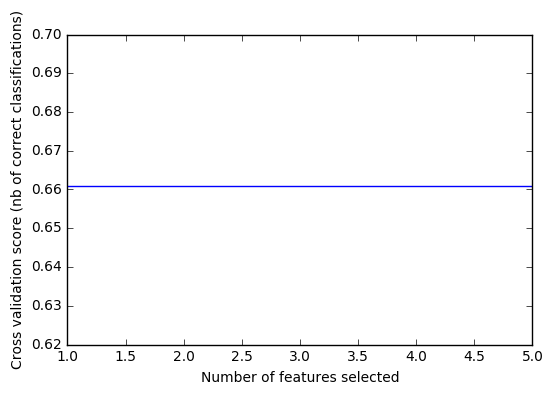

In [17]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(n_splits=5),
              scoring='accuracy')
rfecv.fit(X_trainset, Y_trainset)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Try Linear Support Vector Classifier(SVC)

Optimal number of features : 1


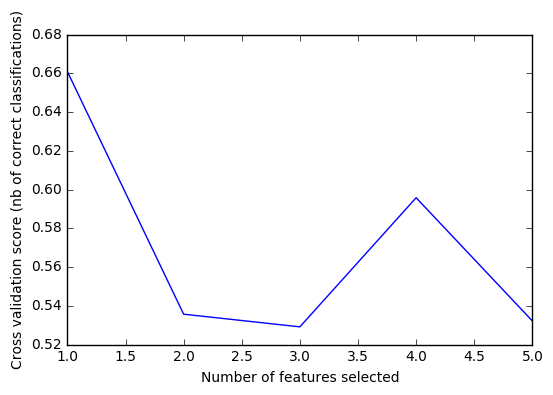

In [18]:
from sklearn import svm
model = svm.LinearSVC()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(n_splits=5),
              scoring='accuracy')
rfecv.fit(X_trainset, Y_trainset)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Try DecisionTree Classifier

Optimal number of features : 1


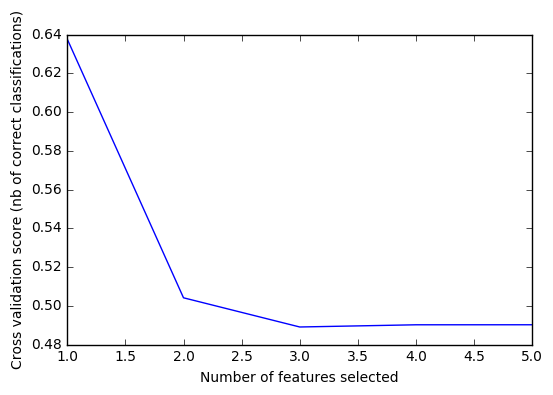

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(n_splits=5),
              scoring='accuracy')
rfecv.fit(X_trainset, Y_trainset)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### From the above, the Logit Regression model gave the best performance.

In [21]:
# Try Logistic Regression
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
model = linear_model.LogisticRegression()
scores = cross_val_score(model, X_trainset, Y_trainset[0], cv=5)
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.66


#### Model Evaluation : Evaluate the model performance using the test data

In [22]:
model = linear_model.LogisticRegression()
scores = cross_val_score(model, X_testset, Y_testset[0], scoring = 'accuracy')
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.68
